## Load Data

In [1]:
# Import data from Google Drive
!gdown 1OgYbPfXFAv3TbwP1Qcwt_CC9cVWSJaco

Downloading...
From: https://drive.google.com/uc?id=1OgYbPfXFAv3TbwP1Qcwt_CC9cVWSJaco
To: /home/dabestevanzzacc/indosum.tar.gz
100%|███████████████████████████████████████| 96.0M/96.0M [00:00<00:00, 265MB/s]


In [2]:
# Download pre-trained word2vec
!gdown 1X5ZPsaoXFxJFrcJ7pVkV9VC81lmDIzdI
!unzip idwiki_word2vec_300.zip

Downloading...
From: https://drive.google.com/uc?id=1X5ZPsaoXFxJFrcJ7pVkV9VC81lmDIzdI
To: /home/dabestevanzzacc/idwiki_word2vec_300.zip
100%|█████████████████████████████████████████| 746M/746M [00:02<00:00, 333MB/s]
Archive:  idwiki_word2vec_300.zip
  inflating: idwiki_word2vec_300.model.trainables.syn1neg.npy  
  inflating: idwiki_word2vec_300.model.wv.vectors.npy  
  inflating: idwiki_word2vec_300.model  


In [3]:
# Download NLTK stopwords
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/dabestevanzzacc/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /home/dabestevanzzacc/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /home/dabestevanzzacc/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /home/dabestevanzzacc/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /home/dabestevanzzacc/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /home/dabestevanzzacc/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_

True

In [4]:
# Extract the dataset
import tarfile

with tarfile.open('indosum.tar.gz') as tar:
   tar.extractall()
   tar.close()

In [5]:
import os
import json

# Load data to dictionary and save as json
BASE_PATH = './indosum'
indosum = {
    'train': [],
    'val': []
}

for i, json_file in enumerate(os.listdir('indosum')):
    if json_file.endswith('.jsonl'):
        split, fold, ext = json_file.split('.')
        file_path = os.path.join(BASE_PATH, json_file)
        
        with open(file_path, 'r') as json_file:
            json_list = list(json_file)
            for json_str in json_list:
                result = json.loads(json_str)
                if result['category'] != 'olahraga':
                    if split == 'train':
                        indosum['train'].append(result)
                    else:
                        indosum['val'].append(result)

#with open('indosum.json', 'w', encoding='utf-8') as f:
#    json.dump(indosum, f, ensure_ascii=False, indent=2)
    

In [6]:
for split in indosum.keys():
    print(len(indosum[split]))

53209
16821


## Preprocess Data

In [7]:
# load pretrained word embedding
import gensim

emb_model = gensim.models.Word2Vec.load('idwiki_word2vec_300.model')

In [8]:
# Stopwords
from nltk.corpus import stopwords

stop_words = set(stopwords.words('indonesian'))

In [9]:
import re

def add_start_end_sequence(summary):
    summary = 'START ' + summary + ' END'
    return summary

def convert_to_article(news_file):
    content_words = []
    for paragraph in news_file['paragraphs']:
        for sentence in paragraph:
            for word in sentence:
                if re.match('[A-Za-z]+', word):
                    word = str(word).lower()
                    if not word in stop_words:
                        content_words.append(word)

    summary_words = []
    for sentence in news_file['summary']:
        for word in sentence:
            if re.match('[A-Za-z]+', word):
                word = str(word).lower()
                if not word in stop_words:
                    summary_words.append(word)

    content_words = ' '.join(content_words)
    summary_words = ' '.join(summary_words)
    
    news_file['paragraphs'] = content_words
    news_file['summary'] = summary_words

In [10]:
for split in indosum.keys():
    for news in indosum[split]:
        convert_to_article(news)

In [11]:
print(indosum['train'][10]['paragraphs'])
print(indosum['train'][10]['summary'])

jakarta cnn indonesia menteri perindustrian airlangga hartarto australia berpeluang destinasi ekspor industri otomotif nasional pasar kendaraan roda mencapai juta unit produsen otomotif terpaksa tutup kesempatan bagus indonesia masuk pasar australia mengutip kamis pemerintah industri otomotif tanah air agresif memperluas pasar ekspor menyeimbangkan kebutuhan pasar domestik kementerian perindustrian menargetkan nilai ekspor mobil tumbuh persen merealisasikan target kemenperin meningkatkan penelitian pengembangan produk penguatan inovasi daya saing memenuhi selera konsumen global produksi nasional kendaraan roda mencapai juta unit ekspor ribu unit target produksi nasional kendaraan roda mencapai juta unit kendaraan produksi negeri didominasi varian multi purpose vehicle mpv sport utility vehicle suv low cost green car lcgc konsumen australia meminati kendaraan berjenis sedan kabin ganda mobil berpenggerak terkait penerapan standar emisi euro4 airlangga mengklaim pelaku industri menjalank

### Visualize Words Distribution

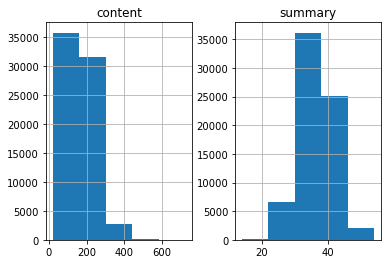

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_words_distribution(dataset_dict):
    content_count = []
    summary_count = []

    for split in dataset_dict.keys():
        for news in dataset_dict[split]:
            content_word_count = len(news['paragraphs'].split(' '))
            summary_word_count = len(news['summary'].split(' '))
            content_count.append(content_word_count)
            summary_count.append(summary_word_count)

    average_length = pd.DataFrame() 

    average_length['content'] = content_count
    average_length['summary'] = summary_count

    average_length.hist(bins = 5)
    plt.show()
    return average_length

average_length = visualize_words_distribution(indosum)          

In [13]:
def count_words_length_percentage(max_len, length_list):
    cnt = 0
    for length in length_list:
        if length <= max_len:
            cnt = cnt + 1
    return cnt / len(length_list)

max_len_content = 300
max_len_summary = 50

print(count_words_length_percentage(max_len_content, average_length['content']))
print(count_words_length_percentage(max_len_summary, average_length['summary']))

0.958075110666857
0.998429244609453


In [14]:
indosum_new = {
    'train': [],
    'val': []
}

for split in indosum_new.keys():
    for news in indosum[split]:
        content_len = len(news['paragraphs'].split(' '))
        summary_len = len(news['summary'].split(' '))
        if (content_len < max_len_content) and (summary_len < (max_len_summary)):
            indosum_new[split].append(news)

In [15]:
for split in indosum_new.keys():
    print(len(indosum_new[split]))

50793
16042


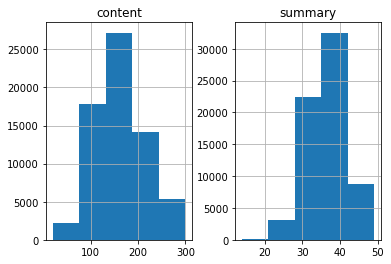

In [16]:
average_length_new = visualize_words_distribution(indosum_new)

## Split to Train, Val

In [17]:
X = {
    'train': [],
     'val': []
}
for split in indosum_new.keys():
    for news in indosum_new[split]:
        X[split].append(news['paragraphs'])

y = {
    'train': [],
     'val': []
}
for split in indosum_new.keys():
    for news in indosum_new[split]:
        summary = add_start_end_sequence(news['summary'])
        y[split].append(summary)

In [18]:
import numpy as np

X_train, X_val = np.array(X['train'], dtype='object'), np.array(X['val'], dtype='object')
y_train, y_val = np.array(y['train'], dtype='object'), np.array(y['val'], dtype='object')

### Tokenization

In [19]:
# Tokenize the text to get the vocab count 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Prepare a tokenizer on training data
x_tokenizer = Tokenizer(lower=False) 
x_tokenizer.fit_on_texts(list(X_train))

In [20]:
# Counting the number of rare words
def count_rare_words(threshold, tokenizer):
    count = 0
    total_count = 0

    for key, value in tokenizer.word_counts.items():
        total_count += 1
        if value < threshold:
            count += 1
            
    print('Threshold: {}'.format(threshold))
    print("% of rare words in vocabulary: ", (count / total_count) * 100)

    return count, total_count

count, total_count = count_rare_words(4, x_tokenizer)

Threshold: 4
% of rare words in vocabulary:  7.636620049359502


In [21]:
padding_type = 'post'
truncation_type = 'post'

# Prepare tokenizer without rare_words
x_tokenizer = Tokenizer(num_words = total_count - count, lower=False) 
x_tokenizer.fit_on_texts(list(X_train))

# Convert text sequences to integer sequences 
x_train_seq = x_tokenizer.texts_to_sequences(X_train) 
x_val_seq = x_tokenizer.texts_to_sequences(X_val)

# Pad zero upto maximum length
x_train = pad_sequences(x_train_seq,  maxlen=max_len_content, padding=padding_type, truncating=truncation_type)
x_val = pad_sequences(x_val_seq, maxlen=max_len_content, padding=padding_type, truncating=truncation_type)

# Size of vocabulary (+1 for padding token)
x_vocab = x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_vocab))

Size of vocabulary in X = 78593


In [22]:
x_word_index = x_tokenizer.word_index

In [23]:
# Prepare a tokenizer on test data
y_tokenizer = Tokenizer(lower=False)
y_tokenizer.fit_on_texts(list(y_train))

count_test, total_count_test = count_rare_words(4, y_tokenizer)

Threshold: 4
% of rare words in vocabulary:  7.980915202775971


In [24]:
# Prepare a tokenizer, again -- by not considering the rare words
y_tokenizer = Tokenizer(num_words = total_count_test - count_test, lower=False)
y_tokenizer.fit_on_texts(list(y_train))

# Convert text sequences to integer sequences 
y_train_seq = y_tokenizer.texts_to_sequences(y_train) 
y_val_seq = y_tokenizer.texts_to_sequences(y_val)


# Pad zero upto maximum length
y_train = pad_sequences(y_train_seq,  maxlen=max_len_summary, padding=padding_type, truncating=truncation_type)
y_val = pad_sequences(y_val_seq, maxlen=max_len_summary, padding=padding_type, truncating=truncation_type)

# Size of vocabulary (+1 for padding token)
y_vocab = y_tokenizer.num_words + 1

print("Size of vocabulary in y = {}".format(y_vocab))

Size of vocabulary in y = 38188


In [25]:
y_word_index = y_tokenizer.word_index

### Get Word Embedding

In [26]:
emb_model.wv['jakarta']

array([ 0.84189427,  0.47632346, -1.1766492 ,  0.25574908,  0.09264122,
       -2.7322097 ,  0.8570757 , -0.57358754,  1.0942527 , -0.9513626 ,
        2.9275017 ,  0.35804108,  1.2643884 , -0.7866188 ,  0.87832814,
        0.09763497, -0.6606212 , -0.28487957,  0.916794  ,  0.9691184 ,
        0.88071096, -2.3729293 ,  0.13130492,  2.2228258 , -0.863914  ,
       -1.1509233 , -1.0396649 ,  2.601395  ,  0.7902187 , -0.19417086,
        0.976901  ,  0.6401671 ,  0.0897091 ,  0.94686574, -1.9991553 ,
        0.9908602 , -0.31589964,  1.5877668 , -0.36063603,  0.49553853,
       -0.19416898,  1.48142   , -0.8472128 ,  0.15805113,  0.979304  ,
        0.31823194,  2.0998394 , -0.8014474 , -0.18803787, -0.3232879 ,
        1.3980634 ,  1.5919431 ,  2.5725882 ,  1.2681477 , -0.18499345,
        0.19948776, -2.2788723 ,  1.2867996 ,  3.758738  ,  0.81254876,
       -2.6911812 , -0.5403767 ,  1.4493308 ,  1.8177983 ,  1.473583  ,
        1.275461  , -1.2754492 , -1.7918911 , -1.7170591 ,  0.05

In [27]:
emb_model.wv['jakarta'].shape

(300,)

In [28]:
#embedded_words = list(emb_model.wv.index_to_key)
#words_in_embedding = 0
#words_not_in_embed = []
#for word in x_word_index:
#    if word in embedded_words:
#        words_in_embedding += 1
#    else:
#        words_not_in_embed.append(word)

#print('{} out of {} words in tokenized dictionary exist in embedding'.format(words_in_embedding, len(x_word_index)))
#print('There are {} words not in word2vec'.format(len(x_word_index) - words_in_embedding))

In [29]:
len(x_tokenizer.word_index)

85090

In [30]:
x_tokenizer.num_words

78592

In [31]:
import numpy as np

embedding_dim = 300

#embedding_matrix = np.zeros((x_vocab, max_len_content))
embedding_matrix = np.zeros((len(x_word_index)+1, max_len_content))
for word, i in x_word_index.items():
    try:
        embedding_vector = emb_model.wv[word]
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    except:
        embedding_matrix[i] = np.zeros(embedding_dim, None)
    
    

In [32]:
x_tokenizer.num_words

78592

In [33]:
len(x_word_index)

85090

## Building Model

In [34]:
#Model Building

#Adding Custom Attention layer 

import tensorflow as tf
import os
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K


class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state """

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch_size*en_seq_len, latent_dim
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            # <= batch_size*en_seq_len, latent_dim
            W_a_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W_a), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W_a_dot_s.shape)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>',U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            reshaped_Ws_plus_Uh = K.tanh(K.reshape(W_a_dot_s + U_a_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.reshape(K.dot(reshaped_Ws_plus_Uh, self.V_a), (-1, en_seq_len))
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """
            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)  # <= (batch_size, enc_seq_len, latent_dim
            fake_state = K.sum(fake_state, axis=[1, 2])  # <= (batch_size)
            fake_state = K.expand_dims(fake_state)  # <= (batch_size, 1)
            fake_state = K.tile(fake_state, [1, hidden_size])  # <= (batch_size, latent_dim
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, \
    Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
embedding_matrix.shape

(85091, 300)

In [37]:
K.clear_session()

latent_dim = 300
embedding_dim = 300

# Setup encoder
encoder_inputs = Input(shape=(max_len_content, ), name='text_input')

encoder_emb = Embedding(len(x_word_index)+1, embedding_dim, trainable=False,
                       weights=[embedding_matrix],
                        input_length=max_len_content)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(encoder_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4)
encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2)

#Setting up the Decoder using 'encoder_states' as initial state
decoder_inputs = Input(shape=(None,))

#Embedding layer
decoder_emb_layer = Embedding(y_vocab, embedding_dim,trainable=True)
decoder_emb = decoder_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(decoder_emb,initial_state=[state_h, state_c])

#Attention layer
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

#Concating Attention input and Decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# Dense Layer
decoder_dense = TimeDistributed(Dense(y_vocab, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

2022-06-10 02:12:27.507597: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-10 02:12:27.770628: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-10 02:12:27.771334: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-10 02:12:27.773122: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text_input (InputLayer)        [(None, 300)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 300, 300)     25527300    ['text_input[0][0]']             
                                                                                                  
 lstm (LSTM)                    [(None, 300, 300),   721200      ['embedding[0][0]']              
                                 (None, 300),                                                     
                                 (None, 300)]                                                     
                                                                                              

In [38]:
#Visualize the Model
from tensorflow.keras.utils import plot_model

#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [39]:
from tensorflow.keras.callbacks import ModelCheckpoint

#Adding Metrics
model.compile(optimizer='rmsprop' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

#Adding Callback
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [40]:
#Training the Model
history = model.fit([x_train,y_train[:,:-1]], 
                    y_train.reshape(y_train.shape[0],y_train.shape[1], 1)[:,1:],
                    epochs=50,
                    callbacks=[es],
                    batch_size= 64,
                    validation_data=([x_val,y_val[:,:-1]], 
                                     y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/50


2022-06-10 02:12:40.709237: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8200


794/794 [==============================] - 679s 839ms/step - loss: 6.0105 - accuracy: 0.2856 - val_loss: 5.2822 - val_accuracy: 0.3174
Epoch 2/50
794/794 [==============================] - 665s 838ms/step - loss: 5.0617 - accuracy: 0.3317 - val_loss: 4.6137 - val_accuracy: 0.3581
Epoch 3/50
794/794 [==============================] - 665s 838ms/step - loss: 4.5280 - accuracy: 0.3655 - val_loss: 4.1597 - val_accuracy: 0.3916
Epoch 4/50
794/794 [==============================] - 664s 836ms/step - loss: 4.1227 - accuracy: 0.3946 - val_loss: 3.7758 - val_accuracy: 0.4220
Epoch 5/50
794/794 [==============================] - 661s 833ms/step - loss: 3.7945 - accuracy: 0.4215 - val_loss: 3.4563 - val_accuracy: 0.4518
Epoch 6/50
794/794 [==============================] - 661s 833ms/step - loss: 3.5191 - accuracy: 0.4470 - val_loss: 3.1965 - val_accuracy: 0.4797
Epoch 7/50
794/794 [==============================] - 661s 833ms/step - loss: 3.2937 - accuracy: 0.4706 - val_loss: 2.9809 - val_accura

In [98]:
#model.save('baseline_3')
!zip -r baseline_3.zip 'baseline 3/'

updating: baseline 3/ (stored 0%)
updating: baseline 3/x_tokenizer.pickle (deflated 52%)
updating: baseline 3/y_tokenizer.pickle (deflated 51%)
updating: baseline 3/tes_inference-Copy1.ipynb (deflated 80%)
updating: baseline 3/.ipynb_checkpoints/ (stored 0%)
updating: baseline 3/.ipynb_checkpoints/tes_inference-Copy1-checkpoint.ipynb (deflated 80%)
updating: baseline 3/baseline_3/ (stored 0%)
updating: baseline 3/baseline_3/variables/ (stored 0%)
updating: baseline 3/baseline_3/variables/variables.index (deflated 69%)
updating: baseline 3/baseline_3/variables/variables.data-00000-of-00001 (deflated 14%)
updating: baseline 3/baseline_3/keras_metadata.pb (deflated 92%)
updating: baseline 3/baseline_3/assets/ (stored 0%)
updating: baseline 3/baseline_3/saved_model.pb (deflated 90%)
  adding: baseline 3/baseline_3.h5 (deflated 14%)


In [99]:
import pickle

with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

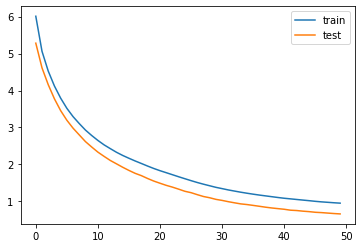

In [57]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

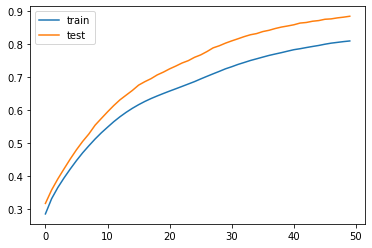

In [58]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [45]:
#Building Dictionary for Source Vocabulary
reverse_target_word_index=y_tokenizer.index_word 
reverse_source_word_index=x_tokenizer.index_word 
target_word_index=y_tokenizer.word_index

In [46]:
#Inference/Validation Phase
#Encoding the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

#Decoder setup
#These tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_content,latent_dim))

#Getting the embeddings of the decoder sequence
dec_emb2= decoder_emb_layer(decoder_inputs) 

#Setting the initial states to the states from the previous time step for better prediction
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#Attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

#Adding Dense softmax layer to generate proability distribution over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat) 

#Final Decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [89]:
for layer in decoder_model.layers:
    print(layer.output)

KerasTensor(type_spec=TensorSpec(shape=(None, None), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, None, 300), dtype=tf.float32, name=None), name='embedding_1/embedding_lookup/Identity_1:0', description="created by layer 'embedding_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 300), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")
KerasTensor(type_spec=TensorSpec(shape=(None, 300), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'")
[<KerasTensor: shape=(None, None, 300) dtype=float32 (created by layer 'lstm_3')>, <KerasTensor: shape=(None, 300) dtype=float32 (created by layer 'lstm_3')>, <KerasTensor: shape=(None, 300) dtype=float32 (created by layer 'lstm_3')>]
KerasTensor(type_spec=TensorSpec(shape=(None, 300, 300), dtype=tf.float32, name='input_4'), name='input_4', description="created by layer 'input_

In [47]:
#Function defining the implementation of inference process
import numpy as np
def decode_sequence(input_seq):
    #Encoding the input as state vectors
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    #Generating empty target sequence of length 1
    target_seq = np.zeros((1,1))
    
    #Populating the first word of target sequence with the start word
    target_seq[0, 0] = target_word_index['START']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        #Sampling a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        if sampled_token_index == 0:
            continue
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if sampled_token != 'END':
            decoded_sentence += ' '+sampled_token

        #Exit condition: either hit max length or find stop word
        if (sampled_token == 'END' or len(decoded_sentence.split()) >= (max_len_summary-1)):
            stop_condition = True

        #Updating the target sequence (of length 1)
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        #Updating internal states
        e_h, e_c = h, c

    return decoded_sentence

In [48]:
#Functions to convert an integer sequence to a word sequence for summary as well as reviews 
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['START']) and i!=target_word_index['END']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [49]:
#for i, news in enumerate(x_dev):
#    print ('Review:', seq2text(news))
#    print ('Original summary:', seq2summary(y_dev[i]))
#    print ('Predicted summary:', decode_sequence(news.reshape(1, max_len_content)))
#    print ('\n')

In [71]:
for i in range(1110, 1180, 5):
    #print("Review:",seq2text(x_val[112]),"\n")
    print("Original summary:",seq2summary(y_val[i]),"\n")
    print("Predicted summary:",decode_sequence(x_val[i].reshape(1,max_len_content)), '\n\n')

Original summary: pemerintah indonesia korea selatan sepakat memperkuat kerja bidang ekonomi sejalan pertemuan bilateral presiden korea selatan moon jae in presiden jokowi istana bogor jawa barat negara menargetkan nilai perdagangan miliar dolar as rp triliun  

Predicted summary:  pemerintah indonesia korea selatan sepakat memperkuat kerja bidang ekonomi sejalan pertemuan bilateral presiden ri pemerintah indonesia membahas mekanisme pasar perdagangan indonesia pertemuan tingkat kepemimpinan as jokowi menilai pemerintah agustus dolar as mengejar nilai ekonomi perdagangan negara mengejar pertumbuhan ekonomi 


Original summary: aplikasi manajemen password populer lastpass mengumumkan rencana meluncurkan paket khusus keluarga lastpass families paket dirancang enam anggota keluarga menyimpan mengakses sandi dokumen perangkat apapun manapun berlangganan lastpass families anggota keluarga berbagi akses rekening bank kartu kredit  

Predicted summary:  aplikasi manajemen password populer las

## Save Tokenizer 

In [95]:
import pickle

def save_pickle(file_path, data):
    with open(file_path, 'wb') as f:
        pickle.dump(data, f, protocol=pickle.HIGHEST_PROTOCOL)
        
save_pickle('x_tokenizer.pickle', x_tokenizer)
save_pickle('y_tokenizer.pickle', y_tokenizer)

In [96]:
y_tokenizer.num_words

38187

In [52]:
test_token = X_val[214]
test_sum = y_val[214]

In [60]:
text = 'Laju Indeks Harga Saham Gabungan (IHSG) anjlok setelah hampir 1,5 jam perdagangan pada Senin (6/6/2022). Investor asing pun melakukan aksi jual saham di seluruh pasar. Mengutip data RTI, pukul 10.23 WIB, IHSG anjlok 1,19 persen ke posisi 7.099,72. IHSG sempat berada di level tertinggi 7.194,53 dan terendah 7.096,52. Sebanyak 287 saham melemah sehingga menekan IHSG. Sementara itu, 231 saham menguat dan 162 saham diam di tempat. Total frekuensi perdagangan 706.314 kali dengan volume perdagangan 11,8 miliar saham. Nilai transaksi harian Rp 5,9 triliun. Investor asing jual saham Rp 357,67 miliar di seluruh pasar. Indeks LQ45 merosot 0,82 persen ke posisi 1.034. Seluruh indeks acuan kompak tertekan. Secara sektoral, sebagian besar sektor saham tertekan. Indeks sektor saham IDXtechno melemah 3,23 persen, dan pimpin penurunan terbesar. Diikuti indeks sektor saham IDXtransportasi susut 1,76 persen, dan indeks sektor saham IDXbasic melemah 1,09 persen. Analis PT MNC Sekuritas, Herditya Wicaksana menuturkan, koreksi IHSG terjadi seiring bursa saham Amerika Serikat atau wall street pada pekan lalu merosot seiring meningkatnya kembali kekhawatiran atas pengetatan kebijakan moneter bank sentral Amerika Serikat atau the Federal Reserve (the Fed). Hal ini setelah rilis data nonfarm payroll yang meningkat dan berada di atas konsensus. "Kemudian dari yield treasury AS 10 tahun juga mulai mendekati angka 3 persen kembali,” kata dia saat dihubungi Liputan6.com, Senin pekan ini. Ia menuturkan, secara teknikal, IHSG juga diprediksi berada di akhir penguatannya dan rawan koreksi dan masih inline. Untuk strategi saham dengan IHSG melemah, Herditya menilai bisa buy on weakness dulu. “Karena kami mencermati akan ada level koreksi ke rentang area 6.960-7.060 terlebih dahulu,” ujar dia. Sedangkan dari sentimen internal, Herditya menilai sepi katalis. Pada pekan ini, hanya ada rilis data cadangan devisa dan indeks kepercayaan konsumen (IKK). “Kita lihat juga sampai detik ini inflow asing masih muncul,” kata dia. Ia menilai, tekanan IHSG ini didorong sentimen eksternal dan kemungkinan ada aksi ambil untung karena IHSG juga sudah menutup gap.'

In [72]:
text = 'JAKARTA, KOMPAS.com - Kepala Bidang Pangan Dinas Ketahanan Pangan Kelautan dan Perikanan (DKPKP) DKI Jakarta Lya Imbasari menjelaskan, melambungnya harga cabai di Ibu kota disebabkan oleh pasokan yang berkurang. Dia mengatakan, jumlah komodotas cabai yang masuk ke Jakarta dalam keadaan normal seberat 35-40 ton per hari. "Namun saat ini pasokan yang masuk hanya berkisar 30 ton per hari," ujar Lya saat dihubungi melalui pesan singkat, Jumat (10/6/2022). Berkurangnya pasokan cabai tersebut mengakibatkan kenaikan harga yang signifikan. Lya mencontohkan, dalam sepekan terakhir cabai rawit merah besar di Pasar Induk Kramat Jati alami kenaikan sebesar 36,81 persen. "Naik dari Rp 52.000 per kilogram menjadi Rp 71.143 per kilogram," tutur Lya. Pasokan yang menurun tersebut, kata Lya, disebabkan daerah produsen sedang diserang hama patek serta layu daun akibat hujan yang berlangsung lama. Gagal panen akibat perubahan cuaca tersebut mengakibatkan harga di tingkat produsen meningkat dan berimbas pada Pasar Induk Kramat Jati. Pemprov DKI Jakarta sendiri sedang mencoba memaksimalkan penggunaan mesin Controlled Atmosphere Storage (CAS) untuk memantau panen produsen dan mendapatkan harga yang lebih terjangkau. "Perumda Pasar Jaya juga melakukan kerjasama antar daerah dengan cara pembelian langsung ke Kelompok Tani penghasil cabai," ujar Lya.'

In [73]:
from nltk import flatten

def inference(text):
    text = [text]
    text_infer = x_tokenizer.texts_to_sequences(text)
    text_infer = pad_sequences(text_infer, maxlen=max_len_content, padding='post', truncating=truncation_type)
    text_infer = decode_sequence(text_infer.reshape(1,max_len_content))
    #print(text_infer)
    print(text_infer)
inference(text)
    

 konsumsi bahan bakar mengalami penurunan harga didukung sayangnya harga cabai disebabkan efek pasar indonesia mengalami kenaikan harga meningkatkan angka dianggap kehilangan pasar tingkat musim hujan dianggap dijadikan musim hujan berhasil musim hujan berhasil musim panas


## Test

In [76]:
#BLEU Score of Training set
#n-gram individual BLEU
from nltk.translate.bleu_score import sentence_bleu
for i in range(0,1000):
  reference = seq2summary(y_train[i])
  candidate = decode_sequence(x_train[i].reshape(1, max_len_content))

print('Individual 1-gram: %f' % sentence_bleu(reference, candidate, weights=(1, 0, 0, 0)))

/opt/conda/lib/python3.7/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/opt/conda/lib/python3.7/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/opt/conda/lib/python3.7/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg

Individual 1-gram: 0.067449
Individual 2-gram: 0.000000
Individual 3-gram: 0.000000
Individual 4-gram: 0.000000


## Saved Each Layer Weight 

In [85]:
!zip -r baseline_3.zip 'baseline 3/'

  adding: baseline 3/ (stored 0%)
  adding: baseline 3/x_tokenizer.pickle (deflated 52%)
  adding: baseline 3/y_tokenizer.pickle (deflated 52%)
  adding: baseline 3/tes_inference-Copy1.ipynb (deflated 80%)
  adding: baseline 3/.ipynb_checkpoints/ (stored 0%)
  adding: baseline 3/.ipynb_checkpoints/tes_inference-Copy1-checkpoint.ipynb (deflated 80%)
  adding: baseline 3/baseline_3/ (stored 0%)
  adding: baseline 3/baseline_3/variables/ (stored 0%)
  adding: baseline 3/baseline_3/variables/variables.index (deflated 69%)
  adding: baseline 3/baseline_3/variables/variables.data-00000-of-00001 (deflated 14%)
  adding: baseline 3/baseline_3/keras_metadata.pb (deflated 92%)
  adding: baseline 3/baseline_3/assets/ (stored 0%)
  adding: baseline 3/baseline_3/saved_model.pb (deflated 90%)


In [90]:
with open('encoder_model.json', 'w', encoding='utf8') as f:
    f.write(encoder_model.to_json())
encoder_model.save_weights('encoder_model_weights.h5')

with open('decoder_model.json', 'w', encoding='utf8') as f:
    f.write(decoder_model.to_json())
encoder_model.save_weights('decoder_model_weights.h5')

In [97]:
model.save('baseline 3/baseline_3.h5')